In [ ]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


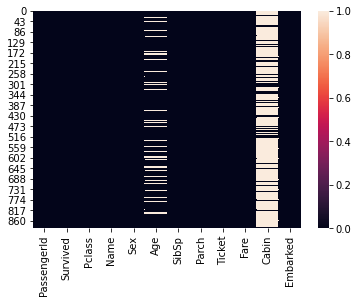

In [ ]:
train.info()
sns.heatmap(train.isnull())

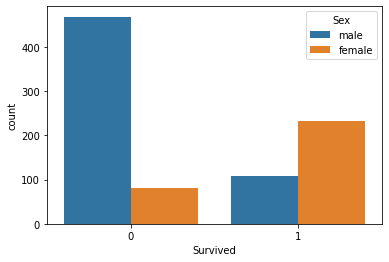

In [ ]:
sns.countplot(x='Survived',data=train, hue='Sex')

In [ ]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


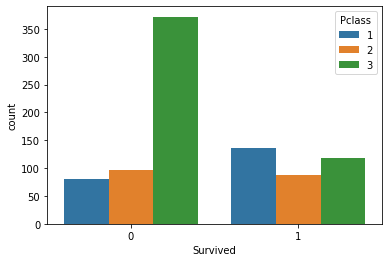

In [ ]:
sns.countplot(x='Survived',data=train,hue='Pclass')

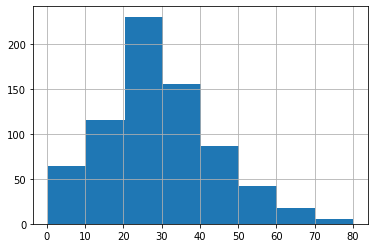

In [ ]:
train['Age'].hist(bins=8)

In [ ]:
# num survivors
train['Survived'].value_counts()[1]


342

In [ ]:
train = train.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
train = pd.get_dummies(train)
features = list(train.columns)
features.remove('Survived')
train = train.dropna()

In [ ]:
# print(features)
# print(train.head())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_data, validation_data = train_test_split(train, test_size=0.20, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
decision_tree_model.fit(train_data[features], train_data['Survived'])
print(accuracy_score(train_data['Survived'], decision_tree_model.predict(train_data[features])))
print(accuracy_score(validation_data['Survived'], decision_tree_model.predict(validation_data[features])))

0.8336252189141856
0.8181818181818182


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=4, min_samples_leaf=1)
random_forest_model.fit(train_data[features], train_data['Survived'])
print(accuracy_score(train_data['Survived'], random_forest_model.predict(train_data[features])))
print(accuracy_score(validation_data['Survived'], random_forest_model.predict(validation_data[features])))

0.8476357267950964
0.8111888111888111


In [ ]:
#AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=100)
adaboost_model.fit(train_data[features], train_data['Survived'])
print(accuracy_score(train_data['Survived'], adaboost_model.predict(train_data[features])))
print(accuracy_score(validation_data['Survived'], adaboost_model.predict(validation_data[features])))

0.8458844133099825
0.8321678321678322


In [ ]:
print(decision_tree_model.score(validation_data[features], validation_data['Survived']))
print(random_forest_model.score(validation_data[features], validation_data['Survived']))
print(adaboost_model.score(validation_data[features], validation_data['Survived']))

0.8181818181818182
0.8111888111888111
0.8321678321678322


In [ ]:
from sklearn import metrics
decision_tree_fpr, decision_tree_tpr, decision_tree_thresholds = metrics.roc_curve(validation_data['Survived'], decision_tree_model.predict(validation_data[features]))
random_forest_fpr, random_forest_tpr, random_forest_thresholds = metrics.roc_curve(validation_data['Survived'], random_forest_model.predict(validation_data[features]))
adaboost_fpr, adaboost_tpr, adaboost_thresholds = metrics.roc_curve(validation_data['Survived'], adaboost_model.predict(validation_data[features]))

Text(0, 0.5, 'true pos rate')

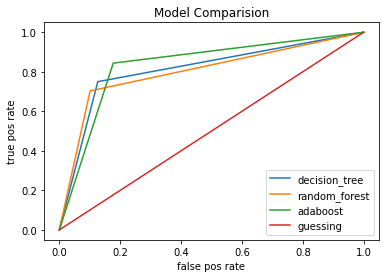

In [ ]:
fig, ax = plt.subplots()
ax.plot(decision_tree_fpr, decision_tree_tpr)
ax.plot(random_forest_fpr, random_forest_tpr)
ax.plot(adaboost_fpr, adaboost_tpr)
ax.plot([0,.5,1],[0,.5,1])
ax.legend(["decision_tree","random_forest","adaboost","guessing"])
ax.set_title("Model Comparision")
ax.set_xlabel("false pos rate") #FP/(FP+TN)
ax.set_ylabel("true pos rate") #TP/(TP+FN)